## Математическое ожидание, дисперсия и матожидание квадрата

Пусть у нас есть распределение плотности случайной величины $f_\xi(x) = \theta^2x \cdot e^{-\theta x}$. Для каждого $\theta \in \{0.5, 2, 8\}$ аналитически вычислить матожидание, дисперсию и матожидание квадрата.

Математическое ожидание определяется как $ E\xi = \int_{-\infty}^{\infty} x f_\xi(x) \, dx $. Так как $f_\xi(x) = 0$ для $x < 0$, интеграл сводится к
$ E\xi = \int_{0}^{\infty} x^2 \cdot \theta^2 xe^{-\theta x} \, dx $ = $\left[ -\theta x^2 e^{-\theta x} \right]_{0}^{\infty} + 2\theta \int_{0}^{\infty} x e^{-\theta x} dx $

Первый член $-\theta x^2 e^{-\theta x}$ при $x \rightarrow \infty$ стремится к нулю, при $x = 0$ равен 0.

Второй член $2\theta \int_{0}^{\infty} x e^{-\theta x} dx$ - это интеграл от функции плотности умноженный на $\frac{2}{\theta}$.

То есть $ E[\xi] = \frac{2}{\theta} $.

Тогда для $\theta = 0.5 $ матожидание равно 4, для $ \theta = 2 $ равно 1, для $ \theta = 8 $ $-$ 0.25

Математическое ожидание квадрата случайной величины определяется как $ E[\xi^2] = \int_{-\infty}^{\infty} x^2 f_\xi(x) \, dx = E\xi = \int_{0}^{\infty} x^3 \cdot \theta^2 xe^{-\theta x} \, dx = \frac{6}{\theta^2}$

- для $\theta = $ 0.5 равно 24
- для $\theta = $ 2 равно 1.5
- для $\theta = $ 8 равно 0.09375.

Дисперсия - это разность между матожиданием квадрата и квадратом матожидания $ D[\xi] = E[\xi^2] - (E[\xi])^2 $.

При $\theta = 0.5$: $D[\xi] = 24 - 4^2 = 8$

При $\theta = 2$: $D[\xi] = 1.5 - 1 = 0.5$

При $\theta = 8$: $D[\xi] =  0.09375 - 0.25^2 = 0.03125$

In [14]:
import math as m
import scipy.stats as sps
import matplotlib.pyplot as plt
import numpy as np

In [20]:
class custom_dist(sps.rv_continuous):
    def _pdf(self, x):
        return 4*x*m.exp(-2*x)

distr = custom_dist(a=0, b=1000, name='custom_distribution')

k_list = [pow(2,i) for i in range(4, 16)]
Ex2_k = []

for k in k_list:
    X = distr.rvs(size=k)
    Ex2_k.append(np.mean(np.square(X)))

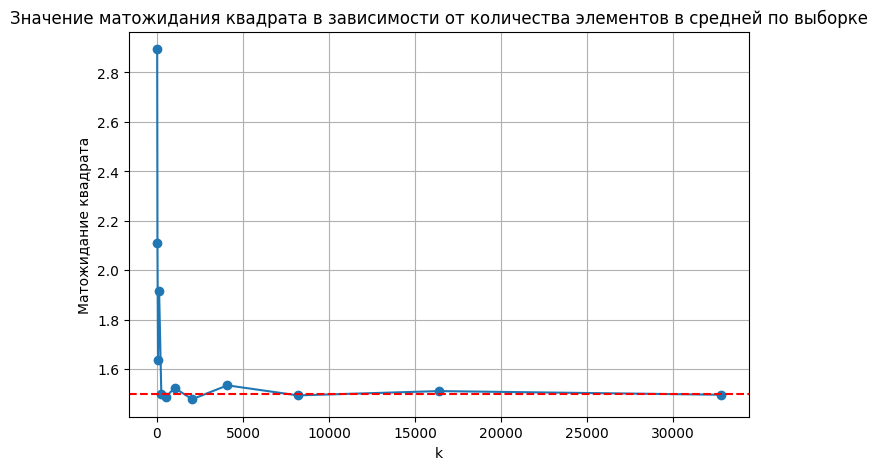

In [56]:
plt.figure(figsize=(8, 5))
plt.plot(k_list, Ex2_k, marker='o', linestyle='-')
plt.axhline(y=1.5, color='r', linestyle='--')
plt.xlabel('k')
plt.ylabel('Матожидание квадрата')
plt.title('Значение матожидания квадрата в зависимости от количества элементов в средней по выборке')
plt.grid(True)
plt.show()

## Мода, матожидание и медиана

$
f_{\xi}(x) =
  \begin{cases} 
    4 \cdot e^{-4(x-4)}, & \text{если } x \geq 4 \\
    0, & \text{иначе}
  \end{cases}
$

Мода для экспоненциального распределения со смещением равна точке смещения $a = 4$, так как это начальная точка, с которой начинается убывание.

Математическое ожидание: $ E[\xi] = \int_{-\infty}^{\infty} x \cdot f(x) \, dx  = \int_{4}^{\infty} x \cdot 4e^{-4(x-4)} \, dx = 4e^{16} \int_{4}^{\infty} x e^{-4x} \, dx = 4.25$

Медиана: $ F(m) = \int_{-\infty}^{m} f(x) \, dx = 0.5 $

$$F(m) = 1 - e^{-4(m-4)} = 0.5$$

$$
e^{-4(m-4)} = 0.5
$$


$$
m-4 = -\frac{\ln(0.5)}{4}
$$

$$
m = 4 + \frac{\ln(2)}{4}
$$

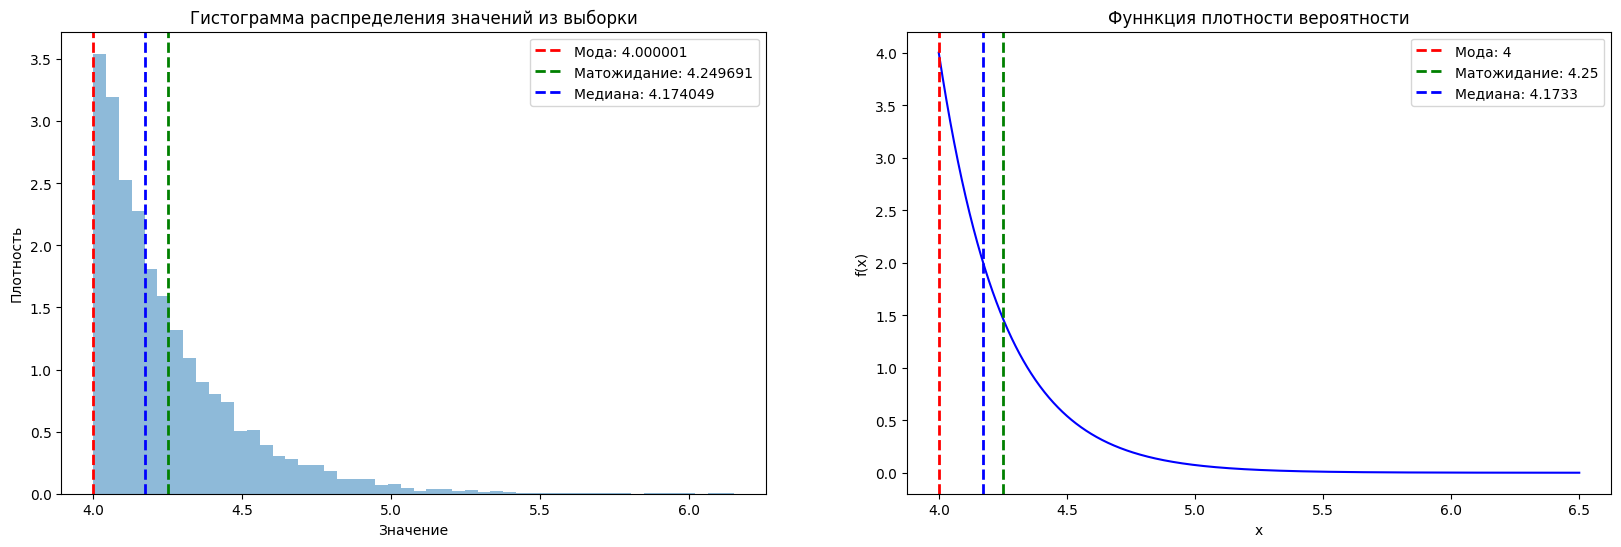

In [55]:
lambda_param = 4
shift = 4
scale = 1 / lambda_param

sample = sps.expon.rvs(scale=scale, loc=shift, size=10000)

mode_estimate = sps.mode(sample, keepdims=False)
mean_estimate = np.mean(sample)
median_estimate = np.median(sample)


fig, axs = plt.subplots(1, 2, figsize=(20, 6))

axs[0].hist(sample, bins=50, alpha=0.5, density=True)
axs[0].axvline(mode_estimate[0], color='red', linestyle='dashed', linewidth=2, label=f'Мода: {mode_estimate[0]:.6f}')
axs[0].axvline(mean_estimate, color='green', linestyle='dashed', linewidth=2, label=f'Матожидание: {mean_estimate:.6f}')
axs[0].axvline(median_estimate, color='blue', linestyle='dashed', linewidth=2, label=f'Медиана: {median_estimate:.6f}')
axs[0].set_title('Гистограмма распределения значений из выборки')
axs[0].set_xlabel('Значение')
axs[0].set_ylabel('Плотность')
axs[0].legend()

x = np.linspace(shift, 6.5, 1000)
y = sps.expon.pdf(x, scale=scale, loc=shift)

axs[1].plot(x, y, color="blue")
axs[1].axvline(4, color='red', linestyle='dashed', linewidth=2, label='Мода: 4')
axs[1].axvline(4.25, color='green', linestyle='dashed', linewidth=2, label='Матожидание: 4.25')
axs[1].axvline(4.1733, color='blue', linestyle='dashed', linewidth=2, label='Медиана: 4.1733')
axs[1].set_title('Фуннкция плотности вероятности')
axs[1].set_xlabel('x')
axs[1].set_ylabel('f(x)')
axs[1].legend()

plt.show()

## Совместное распределение двух случайных величин

Пусть совместное распределение двух случайных величин задано следующим образом:

| $\xi\backslash\eta$ |  1  |  2  |  3  | ... |
|:--:|:---:|:---:|:---:|:---:|
| -1 |  $\frac{2}{5} \cdot \frac{1}{2^1}$ | $\frac{2}{5} \cdot \frac{1}{2^2}$ | $\frac{2}{5} \cdot \frac{1}{2^3}$ | ... |
|  0 | $\frac{1}{5} \cdot \frac{1}{2^1}$ | $\frac{1}{5} \cdot \frac{1}{2^2}$ | $\frac{1}{5} \cdot \frac{1}{2^3}$ | ... |
|  1 | $\frac{2}{5} \cdot \frac{1}{2^1}$  | $\frac{2}{5} \cdot \frac{1}{2^2}$ | $\frac{2}{5} \cdot \frac{1}{2^3}$ | ... |

Где $\eta$ принимает все значения из $\mathbb{N}$.

**Задание**: посчитать корреляционную матрицу, аналитически и приближенно на основе моделирования.

Найдем маргинальные распределения:

$$\frac{2}{5} \cdot \frac{1}{2^1} + \frac{2}{5} \cdot \frac{1}{2^2} + \frac{2}{5} \cdot \frac{1}{2^3} + ... = \sum_{n=1}^{\infty}\frac{2}{5}\cdot\frac{1}{2^n} = \frac{2}{5}$$

$$\frac{1}{5} \cdot \frac{1}{2^1} + \frac{1}{5} \cdot \frac{1}{2^2} + \frac{1}{5} \cdot \frac{1}{2^3} + ... = \sum_{n=1}^{\infty}\frac{1}{5}\cdot\frac{1}{2^n} = \frac{1}{5}$$

$$\begin{array}{c|c|c|c}\xi&-1&0&1\\\hline p_{\xi}&2/5&1/5&2/5\end{array} \quad\Rightarrow\quad \mathsf{E}(\xi)=0$$

$$\frac{2}{5} \cdot \frac{1}{2} + \frac{1}{5} \cdot \frac{1}{2} + \frac{2}{5} \cdot \frac{1}{2} = \frac{5}{10} $$

$$\frac{2}{5} \cdot \frac{1}{4} + \frac{1}{5} \cdot \frac{1}{4} + \frac{2}{5} \cdot \frac{1}{4} = \frac{5}{20} $$

$$\frac{2}{5} \cdot \frac{1}{8} + \frac{1}{5} \cdot \frac{1}{8} + \frac{2}{5} \cdot \frac{1}{8} = \frac{5}{40} $$

$$...$$

$$\begin{array}{c|c|c|c|c|c}\eta&1&2&3&4&...\\\hline p_{\eta}&5/10&5/20&5/40&5/80&...\end{array} \quad\Rightarrow\quad \mathsf{E}(\eta) = \sum_{n=1}^{\infty}\frac{5n}{10 \cdot 2^{n-1}} = 2$$

$$\begin{array}{c|c|c}\xi^2&0&1\\\hline p_{\xi^2}&1/5&4/5\end{array}\quad\Rightarrow\quad \mathsf{E}\xi^2=\frac{4}{5}$$

$$\begin{array}{c|c|c|c|c|c}\eta^2&1&2&3&4&...\\\hline p_{\eta^2}&5/10&0&0&5/20&...\end{array} \quad\Rightarrow\quad \mathsf{E}(\eta^2) = \sum_{n=1}^{\infty}n^2 \cdot \frac{5}{10 \cdot 2^{n-1}} = 6$$

$$\mathsf{E}(\xi\cdot \eta) = -1 \cdot \frac{2}{5} \cdot \frac{1}{2^1} -2 \cdot \frac{2}{5} \cdot \frac{1}{2^2} -3 \cdot \frac{2}{5} \cdot \frac{1}{2^3} + ... +  0 \cdot \frac{1}{5} \cdot \frac{1}{2^1} + 0 \cdot \frac{1}{5} \cdot \frac{1}{2^2} + 0 \cdot \frac{1}{5} \cdot \frac{1}{2^3} + ... + 1 \cdot \frac{2}{5} \cdot \frac{1}{2^1} + 2 \cdot \frac{2}{5} \cdot \frac{1}{2^2} + 3 \cdot \frac{2}{5} \cdot \frac{1}{2^3} + ... = 0$$

Тогда ковариационная матрица 

$$ K=\left[\begin{matrix}4/5&0\\0&2\end{matrix}\right] $$

Корреляционная:

$$ R=\left[\begin{matrix}1&0\\0&1\end{matrix}\right] $$

In [98]:
max_value = 28
values = np.arange(1, max_value + 1)
probabilities = np.array([5/(10 * 2**(n-1)) for n in values])
probabilities /= probabilities.sum()
sample_eta = np.random.choice(values, size=10000, p=probabilities)

values = [-1, 0, 1]
probabilities = [2/5, 1/5, 2/5]
sample_xi = np.random.choice(values, size=10000, p=probabilities)

mean_xi = np.mean(sample_xi)
mean_eta = np.mean(sample_eta)

var_xi = np.var(sample_xi)
var_eta = np.var(sample_eta)

mean_product = np.mean(sample_xi * sample_eta)

cov = mean_product - mean_xi * mean_eta

print('Ковариационная матрица:')
print(f'[{var_xi}, {cov}]')
print(f'[{cov}, {var_eta}]')

norm = np.sqrt(var_xi * var_eta)

print()
print('Корреляционная матрица:')
print(f'[{1}, {cov / norm}]')
print(f'[{cov / norm}, {1}]')

Ковариационная матрица:
[0.8048, -0.0081]
[-0.0081, 1.9595327600000003]

Корреляционная матрица:
[1, -0.0064500750923357055]
[-0.0064500750923357055, 1]
